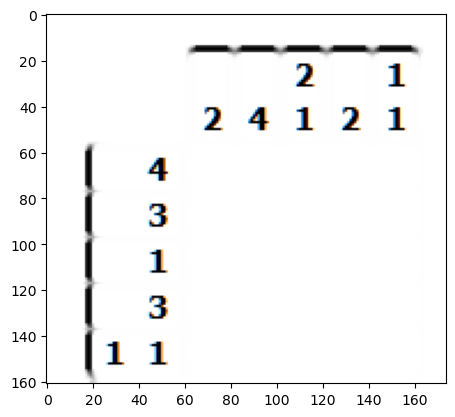

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as pyplot

# Read the image
image = cv2.imread('data/sample.png')




# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to highlight lines better (adjust block size and constant)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

# Use Hough Line Transform to detect horizontal and vertical lines
# Detecting horizontal lines
lines = cv2.HoughLinesP(thresh, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# Create a mask to remove the lines
mask = np.zeros(image.shape, dtype=np.uint8) * 255  # A white mask

# Draw detected lines on the mask (black color)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 4)  # Draw black lines on the mask
#pyplot.imshow(mask)

result = cv2.inpaint(image, cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY), 2, cv2.INPAINT_TELEA)


# Save or show the result
#cv2.imwrite('image_without_lines.jpg', inpainted_image)

pyplot.imshow(result)

#cv2.waitKey(0)
#cv2.destroyAllWindows()